In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# NLP
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from textblob import TextBlob

#BERTopic
from bertopic import BERTopic

%matplotlib inline
nltk.download('stopwords')
nltk.download('punkt')
spacy.cli.download("en_core_web_sm")

/home/rodrigochavoni/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/rodrigochavoni/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rodrigochavoni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/rodrigochavoni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
df_AI = pd.read_csv('data/cs.AI.csv').sample(1500)
df_ML = pd.read_csv('data/cs.LG.csv').sample(1500)
df_IR = pd.read_csv('data/cs.IR.csv').sample(1500)


df_todos = pd.concat([df_AI, df_ML, df_IR], axis=0)

In [19]:
df_IR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1689 to 1318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1500 non-null   object
 1   Updated     1500 non-null   object
 2   Published   1500 non-null   object
 3   Title       1500 non-null   object
 4   Summary     1500 non-null   object
 5   Authors     1500 non-null   object
 6   Categories  1500 non-null   object
dtypes: object(7)
memory usage: 93.8+ KB


In [20]:
# Apresentação dos dados
def show_data_info(data: pd.DataFrame):
    print(f"Shape: {data.shape}")
    print(f"Columns: {data.columns.values}")
    print("Sample:")
    display(data.head())

show_data_info(df_todos)

Shape: (4500, 7)
Columns: ['ID' 'Updated' 'Published' 'Title' 'Summary' 'Authors' 'Categories']
Sample:


,ID,Updated,Published,Title,Summary,Authors,Categories
1631,http://arxiv.org/abs/1301.4991v1,2013-01-21T12:42:17Z,2013-01-21T12:42:17Z,Knowledge Base Approach for 3D Objects Detecti...,This paper presents a knowledge-based detect...,"Helmi Ben Hmida, Christophe Cruz, Frank Boochs...",cs.AI
8066,http://arxiv.org/abs/2212.02098v2,2023-07-08T10:50:19Z,2022-12-05T08:34:23Z,"A Machine with Short-Term, Episodic, and Seman...",Inspired by the cognitive science theory of ...,"Taewoon Kim, Michael Cochez, Vincent François-...",cs.AI
7945,http://arxiv.org/abs/2210.03994v2,2022-12-30T10:48:23Z,2022-10-08T10:35:52Z,Relational Message Passing for Fully Inductive...,"In knowledge graph completion (KGC), predict...","Yuxia Geng, Jiaoyan Chen, Jeff Z. Pan, Mingyan...",cs.AI
6991,http://arxiv.org/abs/2108.08227v1,2021-08-18T16:35:43Z,2021-08-18T16:35:43Z,Analogical Learning in Tactical Decision Games,Tactical Decision Games (TDGs) are military ...,"Tom Hinrichs, Greg Dunham, Ken Forbus","cs.AI, I.2.6; I.2.8"
726,http://arxiv.org/abs/1009.0347v1,2010-09-02T08:03:47Z,2010-09-02T08:03:47Z,Solving the Resource Constrained Project Sched...,The technical report presents a generic exac...,"Andreas Schutt, Thibaut Feydy, Peter J. Stucke...","cs.AI, G.1.6, F.4.1"


In [21]:
# Normalização dos dados (remoção de stopwords, pontuação, etc)
def normalize_text(text: str):
    stopword_list = nltk.corpus.stopwords.words('english')
    return  " ".join([word for word in word_tokenize(text.lower()) if word not in stopword_list and word.isalpha()])


# Geração de coluna normalizada com base em outra coluna
def generate_normalized_column(data: pd.DataFrame, from_column: str):
    new_column_name = f"{from_column}_Normalized"
    print(f"New column name: {new_column_name}")
    data[new_column_name] = data.apply(lambda linha: normalize_text(str(linha[from_column])), axis = 1)
    return new_column_name


normalized_summary_column_name = generate_normalized_column(data=df_todos, from_column="Summary")
normalized_summary_column_name = generate_normalized_column(data=df_AI, from_column="Summary")
# normalized_summary_column_name = generate_normalized_column(data=df_IR, from_column="Summary")

New column name: Summary_Normalized
New column name: Summary_Normalized


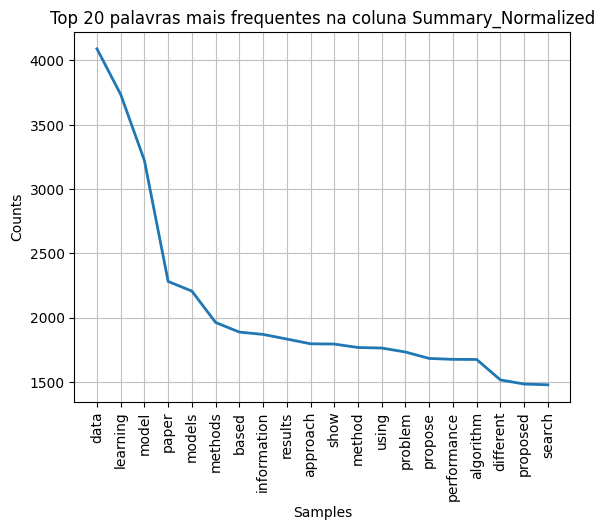

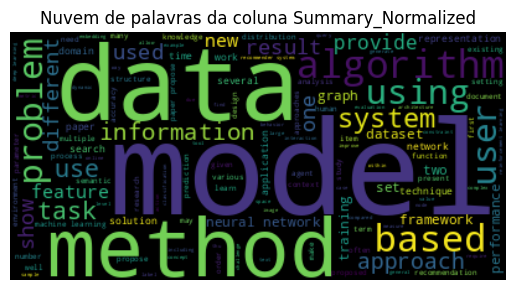

In [22]:
# Geração do histograma de frequência de palavras
def plot_word_frequency_histogram_and_wordcloud(data: pd.DataFrame, column: str, top: int):
    column_data = " ".join(data[column])

    # Histograma
    fdist = FreqDist(column_data.split(" "))
    fdist.plot(top, title=f"Top {top} palavras mais frequentes na coluna {column}")

    # Wordcloud
    wordcloud = WordCloud().generate(column_data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nuvem de palavras da coluna {column}")
    plt.axis("off")
    plt.show()

plot_word_frequency_histogram_and_wordcloud(data=df_todos, column=normalized_summary_column_name, top=20)

In [28]:
topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2')
topics, probs = topic_model.fit_transform(df_todos['Summary_Normalized'])

In [29]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1406,-1_data_learning_search_model,"[data, learning, search, model, paper, informa...",[consider evaluation approximate queries relat...
1,0,522,0_recommendation_user_recommender_users,"[recommendation, user, recommender, users, ite...",[existing recommender systems leverage user be...
2,1,191,1_rl_policy_reinforcement_learning,"[rl, policy, reinforcement, learning, reward, ...",[introduce new optimistic exploration algorith...
3,2,157,2_ai_intelligence_artificial_cognitive,"[ai, intelligence, artificial, cognitive, huma...",[rise deep learning brought artificial intelli...
4,3,138,3_neural_networks_training_deep,"[neural, networks, training, deep, network, dn...",[low precision deep neural network dnn trainin...
...,...,...,...,...,...
68,67,11,67_explanations_explanation_ml_black,"[explanations, explanation, ml, black, rationa...",[machine learning black boxes increasingly dep...
69,68,11,68_sports_badminton_match_team,"[sports, badminton, match, team, esports, stro...",[past years advancements sports information sy...
70,69,11,69_open_metadata_data_web,"[open, metadata, data, web, portals, publicati...",[open data emerging paradigm share large diver...
71,70,10,70_teaching_margin_multicalibration_regression,"[teaching, margin, multicalibration, regressio...",[due significant delay cost associated experim...


In [33]:
df_result = topic_model.get_topic_info()
df_result['Count'].sum()

4500

In [30]:
topic_model.visualize_topics()

In [31]:
topic_model.visualize_barchart()